# Exploring Traffic Camera Offences and Fines in ACT

This dataset is from https://data.gov.au/dataset/ds-act-https%3A%2F%2Fwww.data.act.gov.au%2Fapi%2Fviews%2F2sx9-4wg7/details?q= and it contains monthly fine data related to traffic camera offences in the ACT

In [1]:
#Importing some libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#Reading our dataset
data = pd.read_csv('Traffic_camera_offences_and_fines.csv')
print(list(data.columns.values))

['Offence_Month', 'Rego_State', 'Clt_Catg', 'Camera_Type', 'Location_Code', 'Location_Desc', 'Offence_Desc', 'Sum_Pen_Amt', 'Sum_Inf_Count', 'Sum_With_Amt', 'Sum_With_Count']


In [6]:
data

,Offence_Month,Rego_State,Clt_Catg,Camera_Type,Location_Code,Location_Desc,Offence_Desc,Sum_Pen_Amt,Sum_Inf_Count,Sum_With_Amt,Sum_With_Count
0,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1031.0,FEDERAL HIGHWAY BETWEEN ANTILL STREET AND MAJU...,Non-School Zone Exceed Speed Limit <= 15 Km/H,0.0,0.0,203.0,1.0
1,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1027.0,BARTON HIGHWAY BETWEEN GUNGAHLIN DRIVE AND ELL...,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
2,"Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMER...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1028.0,MONARO HIGHWAY BETWEEN LANYON DRIVE AND SHEPPA...,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
4,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1026.0,BARTON HIGHWAY BETWEEN CURRAN DRIVE AND GOLD C...,Non-school zone exceed speed limit by <= 15km/h,584.0,2.0,0.0,0.0
5,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,3014.0,JERRABOMBERRA AVE NARRABUNDAH COLLEGE,School Zone Exceed Speed Limit By > 15 But <= ...,467.0,1.0,0.0,0.0
6,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,102.0,FAIRBAIRN AVENUE,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
7,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,5.0,BOWEN DRIVE,Non-School Zone Exceed Speed Limit > 15 But <=...,429.0,1.0,0.0,0.0
8,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,129.0,MONARO HIGHWAY,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
9,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,55.0,ATHLLON DRIVE,Non-school zone exceed speed limit by <= 15km/h,1220.0,1.0,0.0,0.0


In [7]:
data['Rego_State']

0         ACT
1         ACT
2         NaN
3         ACT
4         ACT
5         ACT
6         ACT
7         ACT
8         ACT
9         ACT
10        ACT
11        ACT
12        ACT
13        ACT
14        ACT
15        ACT
16        ACT
17        ACT
18        ACT
19        ACT
20        ACT
21        ACT
22        ACT
23        ACT
24        ACT
25        ACT
26        ACT
27        ACT
28        ACT
29        ACT
         ... 
112618    VIC
112619    VIC
112620    VIC
112621    VIC
112622    VIC
112623    VIC
112624    VIC
112625    VIC
112626    VIC
112627    VIC
112628    VIC
112629    VIC
112630    VIC
112631     WA
112632     WA
112633     WA
112634     WA
112635     WA
112636     WA
112637     WA
112638     WA
112639     WA
112640     WA
112641     WA
112642     WA
112643     WA
112644     WA
112645     WA
112646     WA
112647     WA
Name: Rego_State, Length: 112648, dtype: object

In [8]:
data['Offence_Month'][1]

'Mar 2019'

In [9]:
data['Offence_Month'][2]

'Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1034,"TUGGERANONG PARKWAY NEAR COTTER ROAD OVERPASS, NORTHBOUND",Non-school zone exceed speed limit by <= 15km/h,1220,1,0,0'

In [10]:
#Checking rows whre the csv read might not be as successful 
odd = []
for i in data['Offence_Month']:
    if len(i) > 8:
        odd.append(i)
odd

['Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1034,"TUGGERANONG PARKWAY NEAR COTTER ROAD OVERPASS, NORTHBOUND",Non-school zone exceed speed limit by <= 15km/h,1220,1,0,0',
 'Mar 2019,ACT,OTHER ORGN,FIXED ONLY SPEED CAMERA,1034,"TUGGERANONG PARKWAY NEAR COTTER ROAD OVERPASS, NORTHBOUND",Non-School Zone Exceed Speed Limit By > 45 Km/H,0,0,8965,1',
 'Mar 2019,ACT,OTHER ORGN,FIXED ONLY SPEED CAMERA,1035,"TUGGERANONG PARKWAY NEAR COTTER ROAD OVERPASS, SOUTHBOUND",Non-school zone exceed speed limit by <= 15km/h,2440,2,0,0',
 'Mar 2019,ACT,OTHER ORGN,FIXED ONLY SPEED CAMERA,1034,"TUGGERANONG PARKWAY NEAR COTTER ROAD OVERPASS, NORTHBOUND",Non-school zone exceed speed limit by <= 15km/h,2440,2,0,0',
 'Mar 2019,ACT,OTHER ORGN,MOBILE SPEED CAMERA,3066,"CHEWINGS ST, SCULLIN ST MATTHEW’S PRIMARY",School Zone  Exceed Speed Limit By <= 15 Km/H,1335,1,0,0',
 'Mar 2019,ACT,OTHER ORGN,MOBILE SPEED CAMERA,3052,"STERNBERG CRESCENT, WANNIASSA PRIMARY SCHOOL",School Zone  Exceed Speed Limit By <= 15 Km/

In [11]:
len(odd)

5493

In [34]:
odd_data = [[odd]]
odd_data

[[['Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1034,"TUGGERANONG PARKWAY NEAR COTTER ROAD OVERPASS, NORTHBOUND",Non-school zone exceed speed limit by <= 15km/h,1220,1,0,0',
   'Mar 2019,ACT,OTHER ORGN,FIXED ONLY SPEED CAMERA,1034,"TUGGERANONG PARKWAY NEAR COTTER ROAD OVERPASS, NORTHBOUND",Non-School Zone Exceed Speed Limit By > 45 Km/H,0,0,8965,1',
   'Mar 2019,ACT,OTHER ORGN,FIXED ONLY SPEED CAMERA,1035,"TUGGERANONG PARKWAY NEAR COTTER ROAD OVERPASS, SOUTHBOUND",Non-school zone exceed speed limit by <= 15km/h,2440,2,0,0',
   'Mar 2019,ACT,OTHER ORGN,FIXED ONLY SPEED CAMERA,1034,"TUGGERANONG PARKWAY NEAR COTTER ROAD OVERPASS, NORTHBOUND",Non-school zone exceed speed limit by <= 15km/h,2440,2,0,0',
   'Mar 2019,ACT,OTHER ORGN,MOBILE SPEED CAMERA,3066,"CHEWINGS ST, SCULLIN ST MATTHEW’S PRIMARY",School Zone  Exceed Speed Limit By <= 15 Km/H,1335,1,0,0',
   'Mar 2019,ACT,OTHER ORGN,MOBILE SPEED CAMERA,3052,"STERNBERG CRESCENT, WANNIASSA PRIMARY SCHOOL",School Zone  Exceed Speed Limit 

In [14]:
#Creating a copy of our original dataset
data_copy = data.copy()

In [15]:
data = data.dropna()

In [16]:
data

,Offence_Month,Rego_State,Clt_Catg,Camera_Type,Location_Code,Location_Desc,Offence_Desc,Sum_Pen_Amt,Sum_Inf_Count,Sum_With_Amt,Sum_With_Count
0,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1031.0,FEDERAL HIGHWAY BETWEEN ANTILL STREET AND MAJU...,Non-School Zone Exceed Speed Limit <= 15 Km/H,0.0,0.0,203.0,1.0
1,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1027.0,BARTON HIGHWAY BETWEEN GUNGAHLIN DRIVE AND ELL...,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
3,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1028.0,MONARO HIGHWAY BETWEEN LANYON DRIVE AND SHEPPA...,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
4,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1026.0,BARTON HIGHWAY BETWEEN CURRAN DRIVE AND GOLD C...,Non-school zone exceed speed limit by <= 15km/h,584.0,2.0,0.0,0.0
5,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,3014.0,JERRABOMBERRA AVE NARRABUNDAH COLLEGE,School Zone Exceed Speed Limit By > 15 But <= ...,467.0,1.0,0.0,0.0
6,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,102.0,FAIRBAIRN AVENUE,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
7,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,5.0,BOWEN DRIVE,Non-School Zone Exceed Speed Limit > 15 But <=...,429.0,1.0,0.0,0.0
8,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,129.0,MONARO HIGHWAY,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
9,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,55.0,ATHLLON DRIVE,Non-school zone exceed speed limit by <= 15km/h,1220.0,1.0,0.0,0.0
10,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,4004.0,FLEMINGTON ROAD – ROAD WORKS,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0


In [17]:
#Checking rows whre the csv read might not be as successful 
odd = []
for i in data['Offence_Month']:
    if len(i) > 8:
        odd.append(i)
odd

[]

# Understanding our dataset

Data dictionary from 
- Offence_Month: The month and year the offence was committed. (Date & Time) 
- Rego_State: The jurisdiction displayed on the numberplate of the vehicle involved in the offence. (Plain Text)
- Clt_Catg: Vehicle registrations are grouped into the following client categories; Diplomatic, Embassy staff(Privileged), Government Client, Religious or Charitable client, Other Person and Other organisation. (Plain Text)
- Camera_Type: The ACT has a variety of speed cameras. This column displays the particular type of camera used at that location. (Plain Text)
- Location_Code: A code is assigned to identify each street. (Plain Text)
- Location_Desc: The street, or cross streets, where the camera is located. (Plain Text)
- Offence_Desc: A description of the offence committed (Plain Text)
- Sum_Pen_Amt: The total dollar amount of penalties issued for the line of data displayed. (Number) 
- Sum_Inf_Count: The number of infringements issued for the line of data displayed. (Number) 
- Sum_With_Amt: The total dollar amount of penalties withdrawn for the line of data displayed. The withdrawal amount relates to the date the fine was withdrawn, not the date the original fine occurred. (Number) 
- Sum_With_Count: The total dollar amount of penalties withdrawn for the line of data displayed. The withdrawal amount relates to the date the fine was withdrawn, not the date the original fine occurred. (NUmber) 

# What might we be able to find out based on this dataset?

- When were most # of offences committed? Did it differ across years?
- Were there COVID-19 impacts?
- How long did it take for fines to be penalised till when the fine was withdrawn?
- Whhat was the avergae fine per day?
- Whether there are differences between fines across: rego state, client category, location
- What could be predictors of amount ($) in penalities?
- Word cloud of fines occured? 

In [18]:
#Printing the first few columns
print(data.head())

  Offence_Month Rego_State    Clt_Catg              Camera_Type  \
0      Mar 2019        ACT  Diplomatic  FIXED ONLY SPEED CAMERA   
1      Mar 2019        ACT  Diplomatic  FIXED ONLY SPEED CAMERA   
3      Mar 2019        ACT  Diplomatic  FIXED ONLY SPEED CAMERA   
4      Mar 2019        ACT  Diplomatic  FIXED ONLY SPEED CAMERA   
5      Mar 2019        ACT  Diplomatic      MOBILE SPEED CAMERA   

   Location_Code                                      Location_Desc  \
0         1031.0  FEDERAL HIGHWAY BETWEEN ANTILL STREET AND MAJU...   
1         1027.0  BARTON HIGHWAY BETWEEN GUNGAHLIN DRIVE AND ELL...   
3         1028.0  MONARO HIGHWAY BETWEEN LANYON DRIVE AND SHEPPA...   
4         1026.0  BARTON HIGHWAY BETWEEN CURRAN DRIVE AND GOLD C...   
5         3014.0              JERRABOMBERRA AVE NARRABUNDAH COLLEGE   

                                        Offence_Desc  Sum_Pen_Amt  \
0      Non-School Zone Exceed Speed Limit <= 15 Km/H          0.0   
1    Non-school zone exceed spee

In [19]:
data

,Offence_Month,Rego_State,Clt_Catg,Camera_Type,Location_Code,Location_Desc,Offence_Desc,Sum_Pen_Amt,Sum_Inf_Count,Sum_With_Amt,Sum_With_Count
0,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1031.0,FEDERAL HIGHWAY BETWEEN ANTILL STREET AND MAJU...,Non-School Zone Exceed Speed Limit <= 15 Km/H,0.0,0.0,203.0,1.0
1,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1027.0,BARTON HIGHWAY BETWEEN GUNGAHLIN DRIVE AND ELL...,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
3,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1028.0,MONARO HIGHWAY BETWEEN LANYON DRIVE AND SHEPPA...,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
4,Mar 2019,ACT,Diplomatic,FIXED ONLY SPEED CAMERA,1026.0,BARTON HIGHWAY BETWEEN CURRAN DRIVE AND GOLD C...,Non-school zone exceed speed limit by <= 15km/h,584.0,2.0,0.0,0.0
5,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,3014.0,JERRABOMBERRA AVE NARRABUNDAH COLLEGE,School Zone Exceed Speed Limit By > 15 But <= ...,467.0,1.0,0.0,0.0
6,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,102.0,FAIRBAIRN AVENUE,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
7,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,5.0,BOWEN DRIVE,Non-School Zone Exceed Speed Limit > 15 But <=...,429.0,1.0,0.0,0.0
8,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,129.0,MONARO HIGHWAY,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0
9,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,55.0,ATHLLON DRIVE,Non-school zone exceed speed limit by <= 15km/h,1220.0,1.0,0.0,0.0
10,Mar 2019,ACT,Diplomatic,MOBILE SPEED CAMERA,4004.0,FLEMINGTON ROAD – ROAD WORKS,Non-school zone exceed speed limit by <= 15km/h,292.0,1.0,0.0,0.0


In [26]:
description = data.describe().round(2)
skew = data.skew(0).round(2)
kurt = data.kurtosis(0).round(2)
description.loc['skew'] = skew
description.loc['kurtosis'] = kurt
description

,Location_Code,Sum_Pen_Amt,Sum_Inf_Count,Sum_With_Amt,Sum_With_Count
count,99464.00,99464.00,99464.00,99464.00,99464.00
mean,894.10,2806.92,7.92,160.02,0.42
std,943.75,14879.60,45.82,799.10,2.09
min,1.00,0.00,0.00,0.00,0.00
25%,111.00,307.00,1.00,0.00,0.00
50%,1004.00,858.00,1.00,0.00,0.00
75%,1028.00,2020.00,4.00,0.00,0.00
max,4006.00,1766569.00,5869.00,134246.00,446.00
skew,1.31,52.03,58.47,60.46,103.53
kurtosis,0.93,4486.75,5821.53,8559.70,21076.26


In [30]:
data.corr()

,Location_Code,Sum_Pen_Amt,Sum_Inf_Count,Sum_With_Amt,Sum_With_Count
Location_Code,1.000000,0.029862,0.021249,0.019726,0.009991
Sum_Pen_Amt,0.029862,1.000000,0.914535,0.170687,0.245343
Sum_Inf_Count,0.021249,0.914535,1.000000,0.202402,0.327370
Sum_With_Amt,0.019726,0.170687,0.202402,1.000000,0.729418
Sum_With_Count,0.009991,0.245343,0.327370,0.729418,1.000000


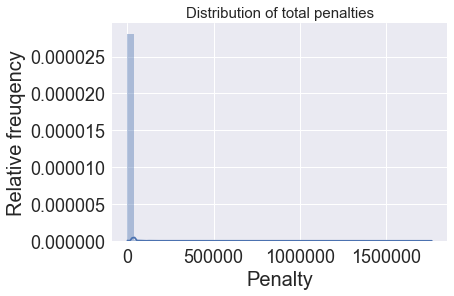

In [34]:
penalty = data.dropna(subset= ['Sum_Pen_Amt']) # use subset with dropped NaN enrol values
penalty = sns.distplot(data['Sum_Pen_Amt'])
penalty.set_title('Distribution of total penalties', fontsize=15)
penalty.set_xlabel('Penalty', fontsize = 20)
penalty.set_ylabel('Relative freuqency', fontsize = 20)
sns.despine()

In [35]:
data_zeropen = data[data['Sum_Pen_Amt']>0]

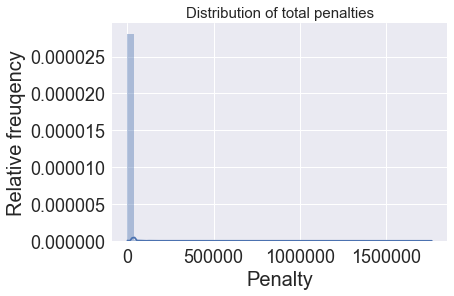

In [36]:
penalty = data.dropna(subset= ['Sum_Pen_Amt']) # use subset with dropped NaN enrol values
penalty = sns.distplot(data['Sum_Pen_Amt'])
penalty.set_title('Distribution of total penalties', fontsize=15)
penalty.set_xlabel('Penalty', fontsize = 20)
penalty.set_ylabel('Relative freuqency', fontsize = 20)
sns.despine()

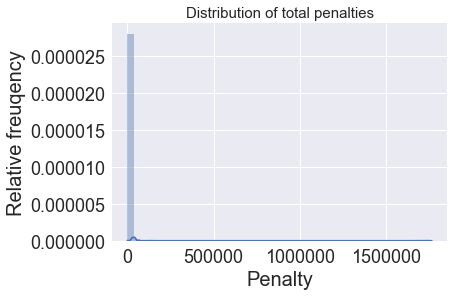

In [38]:
penaltyno0 = data_zeropen.dropna(subset= ['Sum_Pen_Amt']) # use subset with dropped NaN enrol values
penaltyno0 = sns.distplot(data_zeropen['Sum_Pen_Amt'])
penaltyno0.set_title('Distribution of total penalties', fontsize=15)
penaltyno0.set_xlabel('Penalty', fontsize = 20)
penaltyno0.set_ylabel('Relative freuqency', fontsize = 20)
sns.despine()

Text(0,0.5,'Count')

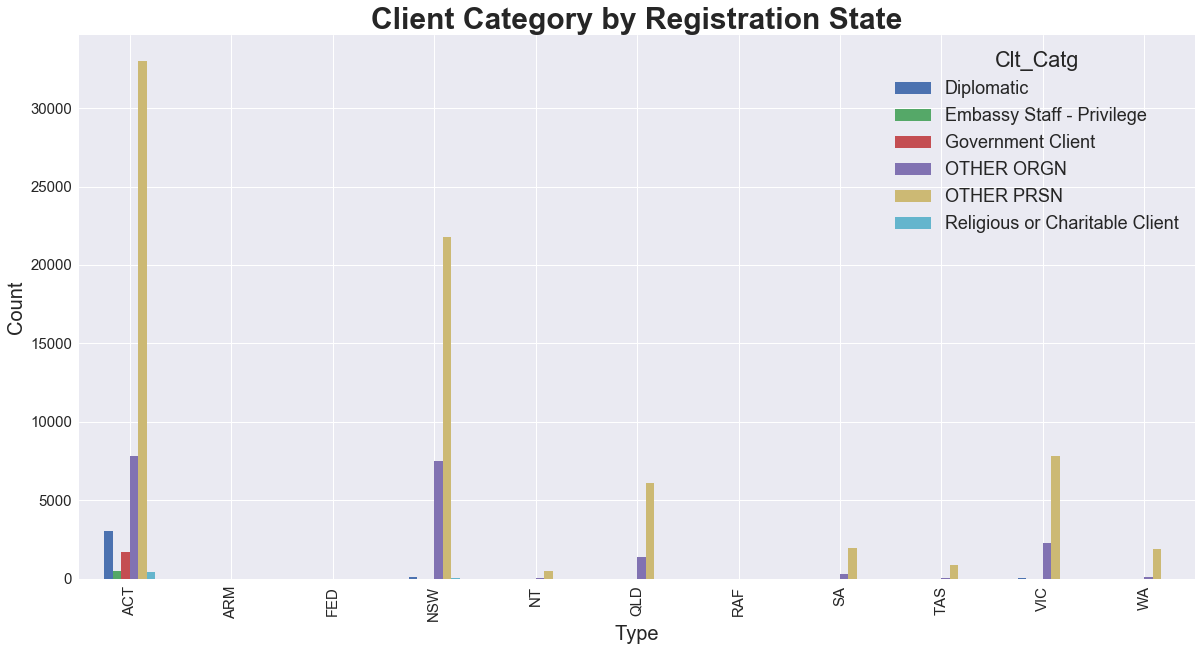

In [43]:
state_cltcat = pd.crosstab(data['Rego_State'], data['Clt_Catg'])
st = state_cltcat.plot.bar(figsize = (20, 10), fontsize = 15)    
st.set_title('Client Category by Registration State', fontweight='bold', fontsize=30)
st.set_xlabel('Type', fontsize = 20)
st.set_ylabel('Count', fontsize = 20)

Text(-15.672,0.5,'Withdraw amount')

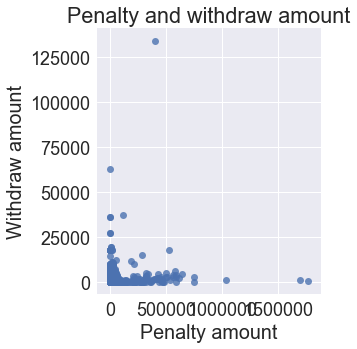

In [46]:
scatteramtwith = sns.lmplot( x='Sum_Pen_Amt', y='Sum_With_Amt', data=data, fit_reg=False, legend=True, size = 5)
scatteramtwith = plt.gca()
scatteramtwith.set_title('Penalty and withdraw amount')
scatteramtwith.set_xlabel('Penalty amount')
scatteramtwith.set_ylabel('Withdraw amount')

In [ ]:
#Distribution of